# Workbench


**Import packages**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline

In [22]:
supermarket_df = pd.read_csv("supermarket_till_transactions.csv")
supermarket_df.sample(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
17,200607,20060414,6,15,1,200,PRD0901040,CL00201,DEP00067,G00021,...,LA,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01
70,200607,20060412,4,20,1,46,PRD0904891,CL00025,DEP00008,G00004,...,NaN,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02
31,200607,20060413,5,8,1,118,PRD0900653,CL00046,DEP00012,G00004,...,MM,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01
104,200607,20060412,4,12,3,432,PRD0903335,CL00198,DEP00067,G00021,...,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03
68,200607,20060412,4,20,1,129,PRD0902686,CL00067,DEP00019,G00007,...,NaN,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02


In [23]:
supermarket_df.isna().sum()

SHOP_WEEK                    0
SHOP_DATE                    0
SHOP_WEEKDAY                 0
SHOP_HOUR                    0
QUANTITY                     0
SPEND                        0
PROD_CODE                    0
PROD_CODE_10                 0
PROD_CODE_20                 0
PROD_CODE_30                 0
PROD_CODE_40                 0
CUST_CODE                   46
CUST_PRICE_SENSITIVITY      46
CUST_LIFESTAGE              46
BASKET_ID                    0
BASKET_SIZE                  0
BASKET_PRICE_SENSITIVITY     0
BASKET_TYPE                  0
BASKET_DOMINANT_MISSION      0
STORE_CODE                   0
STORE_FORMAT                 0
STORE_REGION                 0
dtype: int64

In [24]:
supermarket_df.columns

Index(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT',
       'STORE_REGION'],
      dtype='object')

In [25]:
supermarket_df = supermarket_df.drop(columns=['BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION','CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE','SHOP_WEEK','PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40'])
supermarket_df.sample(5)

,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,STORE_CODE,STORE_FORMAT,STORE_REGION
69,20060412,4,20,1,38,STORE00025,XLS,S02
88,20060412,4,13,1,28,STORE00078,LS,S01
38,20060413,5,8,1,180,STORE00008,MS,N01
95,20060412,4,15,1,151,STORE00103,MS,N03
2,20060413,5,20,3,84,STORE00001,LS,E02


In [26]:
supermarket_df.nunique()

SHOP_DATE         5
SHOP_WEEKDAY      5
SHOP_HOUR         9
QUANTITY          5
SPEND           101
STORE_CODE       16
STORE_FORMAT      4
STORE_REGION      9
dtype: int64

In [27]:
supermarket_df.dtypes

SHOP_DATE        int64
SHOP_WEEKDAY     int64
SHOP_HOUR        int64
QUANTITY         int64
SPEND            int64
STORE_CODE      object
STORE_FORMAT    object
STORE_REGION    object
dtype: object

In [42]:
trial_df = pd.get_dummies(data=supermarket_df, columns=['STORE_CODE', 'STORE_FORMAT', 'STORE_REGION'],drop_first=True)
trial_df.sample(5)

,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,STORE_CODE_STORE00002,STORE_CODE_STORE00008,STORE_CODE_STORE00013,STORE_CODE_STORE00024,STORE_CODE_STORE00025,...,STORE_FORMAT_SS,STORE_FORMAT_XLS,STORE_REGION_N01,STORE_REGION_N02,STORE_REGION_N03,STORE_REGION_S01,STORE_REGION_S02,STORE_REGION_S03,STORE_REGION_W01,STORE_REGION_W02
104,20060412,4,12,3,432,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37,20060413,5,8,3,303,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39,20060413,5,8,3,243,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
69,20060412,4,20,1,38,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
57,20060410,2,9,1,64,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


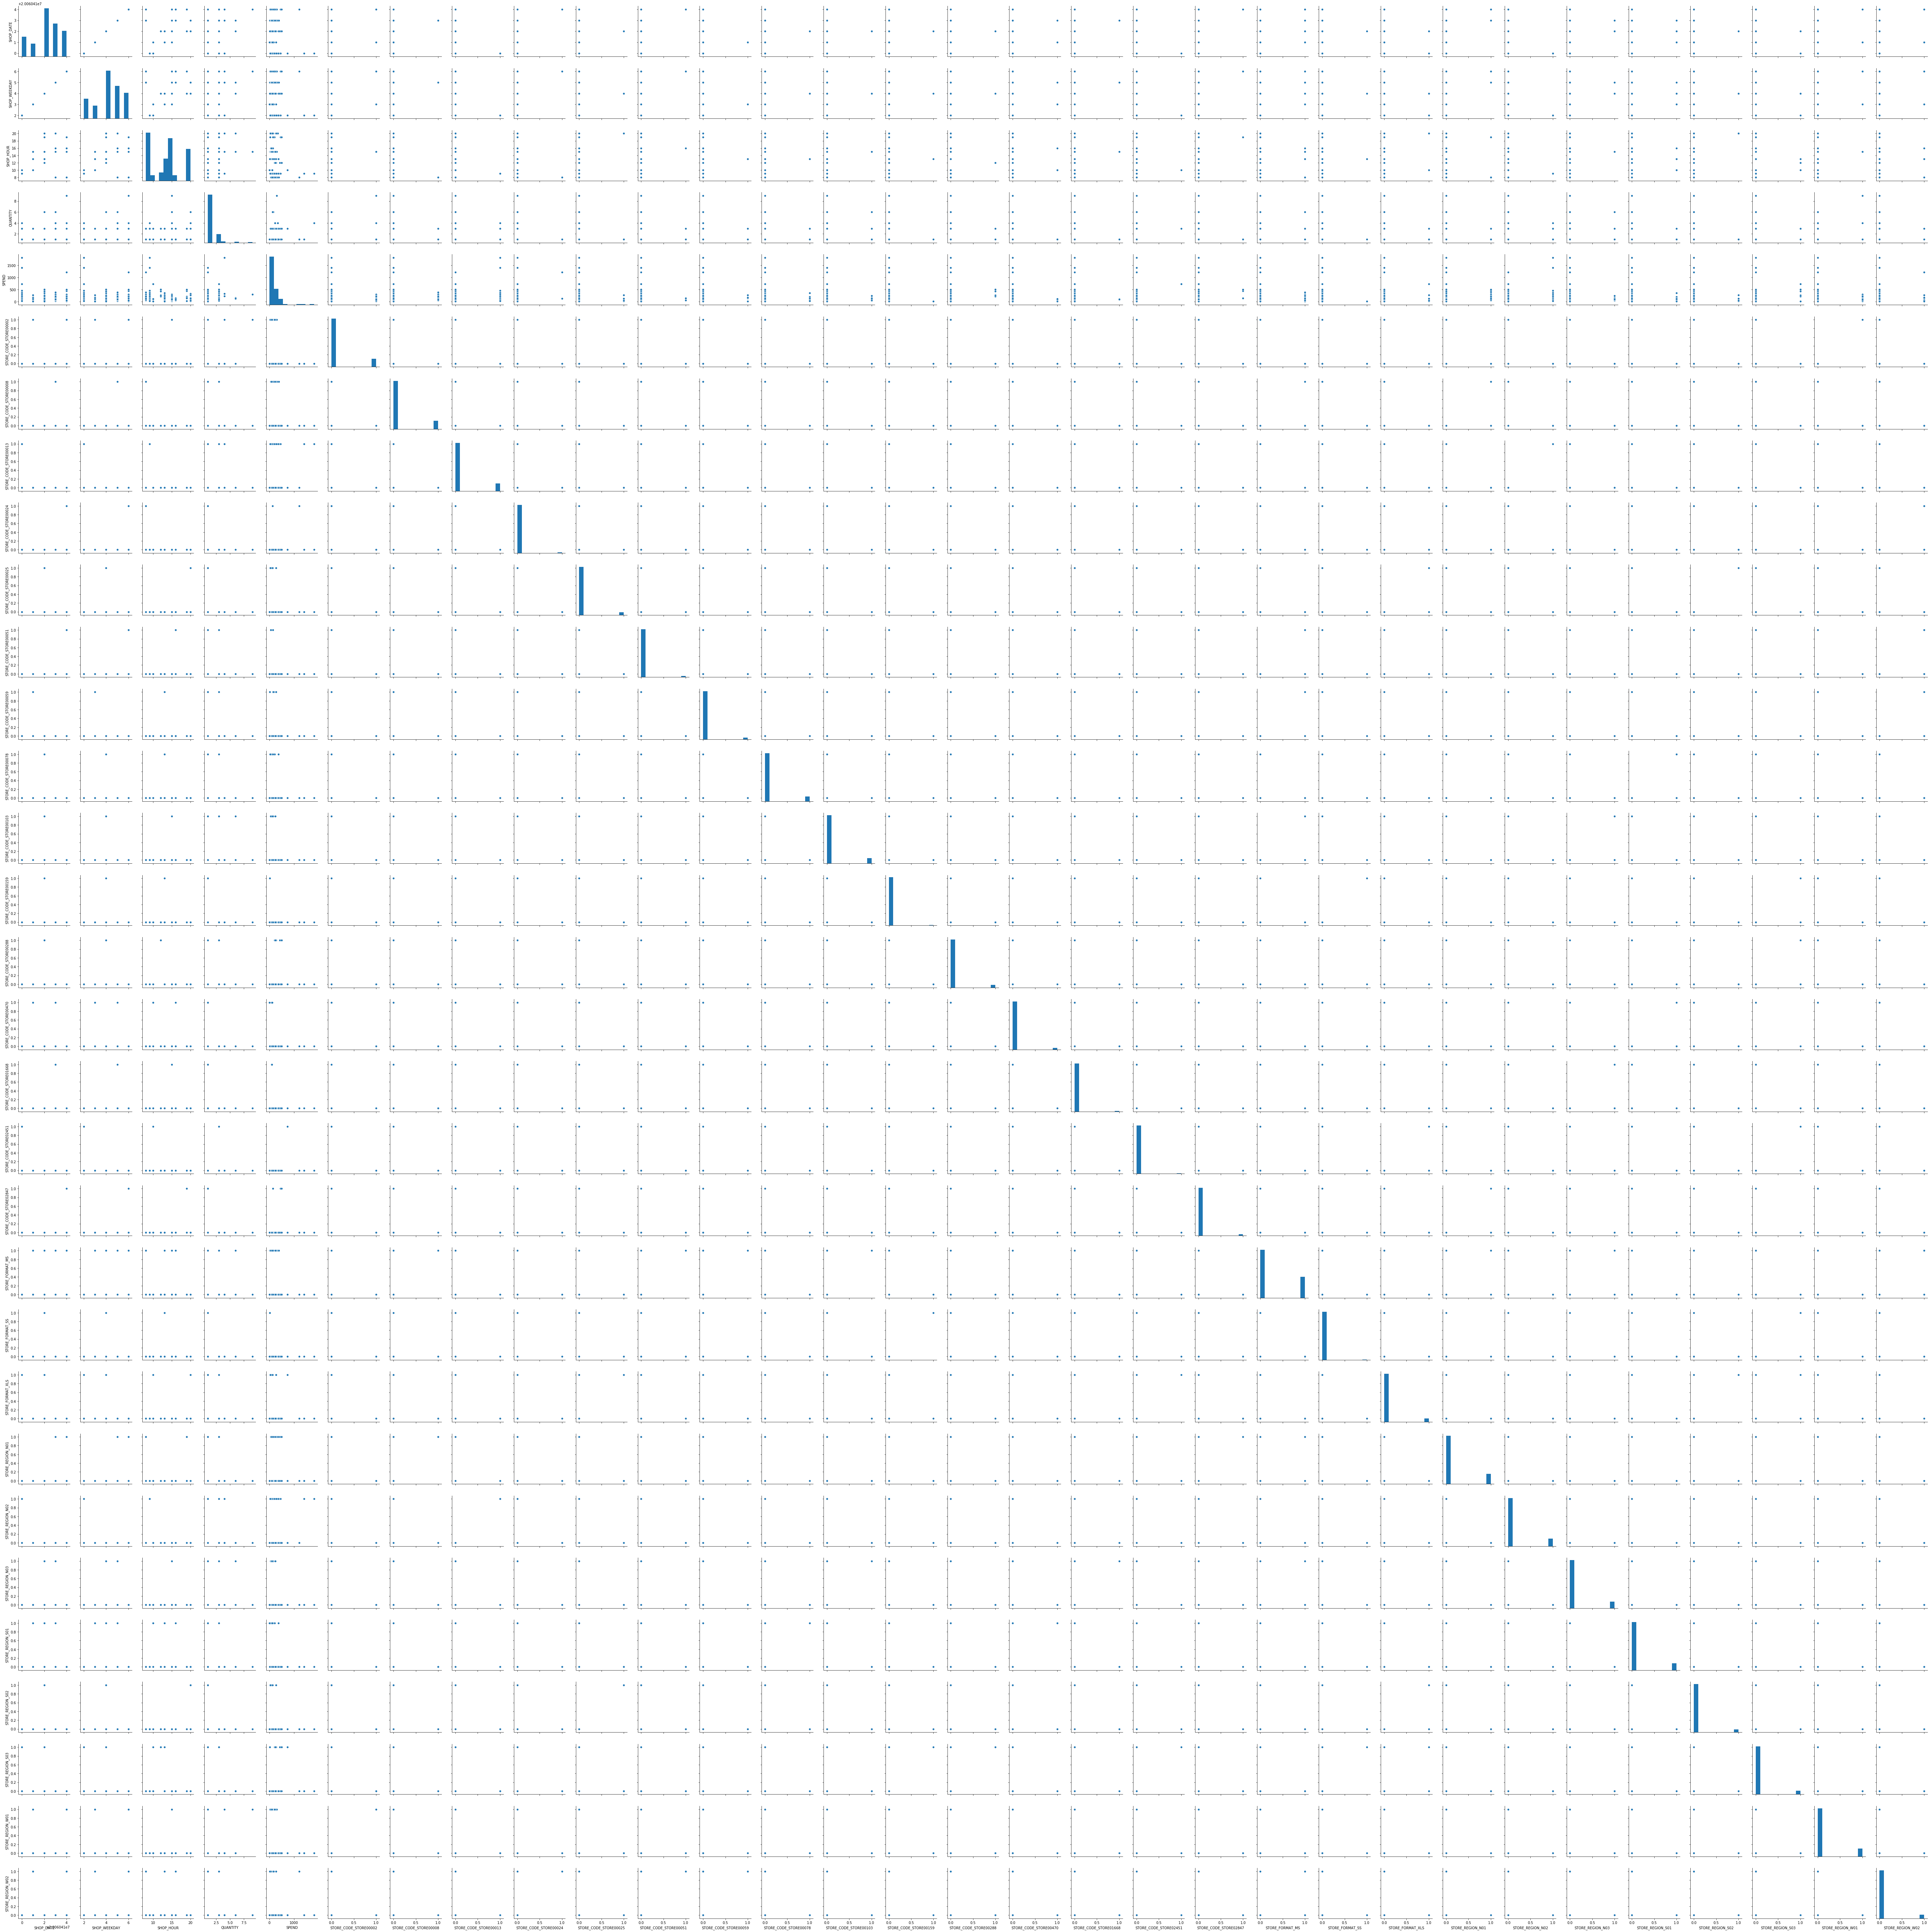

In [44]:
sns.pairplot(data=trial_df)

In [45]:
trial_df.columns

Index(['SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY', 'SPEND',
       'STORE_CODE_STORE00002', 'STORE_CODE_STORE00008',
       'STORE_CODE_STORE00013', 'STORE_CODE_STORE00024',
       'STORE_CODE_STORE00025', 'STORE_CODE_STORE00051',
       'STORE_CODE_STORE00059', 'STORE_CODE_STORE00078',
       'STORE_CODE_STORE00103', 'STORE_CODE_STORE00159',
       'STORE_CODE_STORE00288', 'STORE_CODE_STORE00470',
       'STORE_CODE_STORE01668', 'STORE_CODE_STORE02451',
       'STORE_CODE_STORE02847', 'STORE_FORMAT_MS', 'STORE_FORMAT_SS',
       'STORE_FORMAT_XLS', 'STORE_REGION_N01', 'STORE_REGION_N02',
       'STORE_REGION_N03', 'STORE_REGION_S01', 'STORE_REGION_S02',
       'STORE_REGION_S03', 'STORE_REGION_W01', 'STORE_REGION_W02'],
      dtype='object')

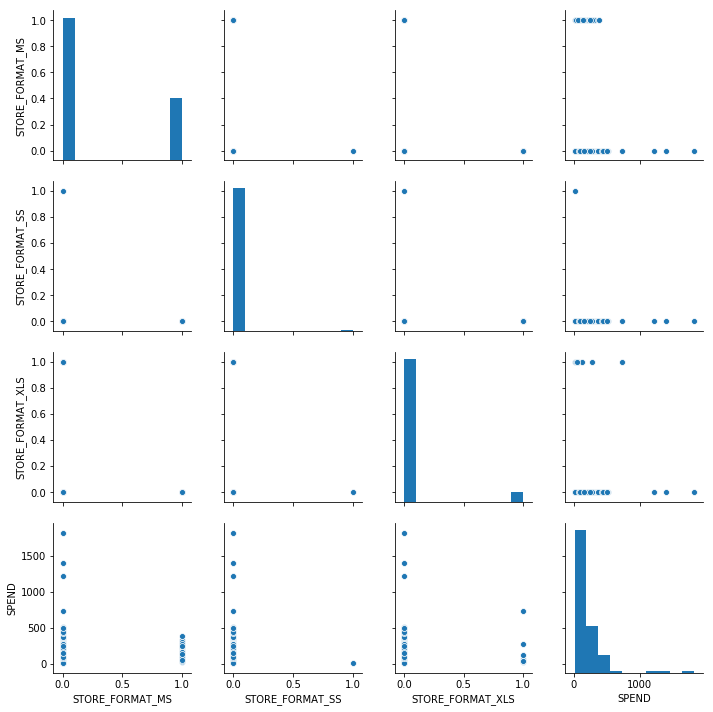

In [46]:
sns.pairplot(data=trial_df[['STORE_FORMAT_MS', 'STORE_FORMAT_SS',
       'STORE_FORMAT_XLS', 'SPEND']])

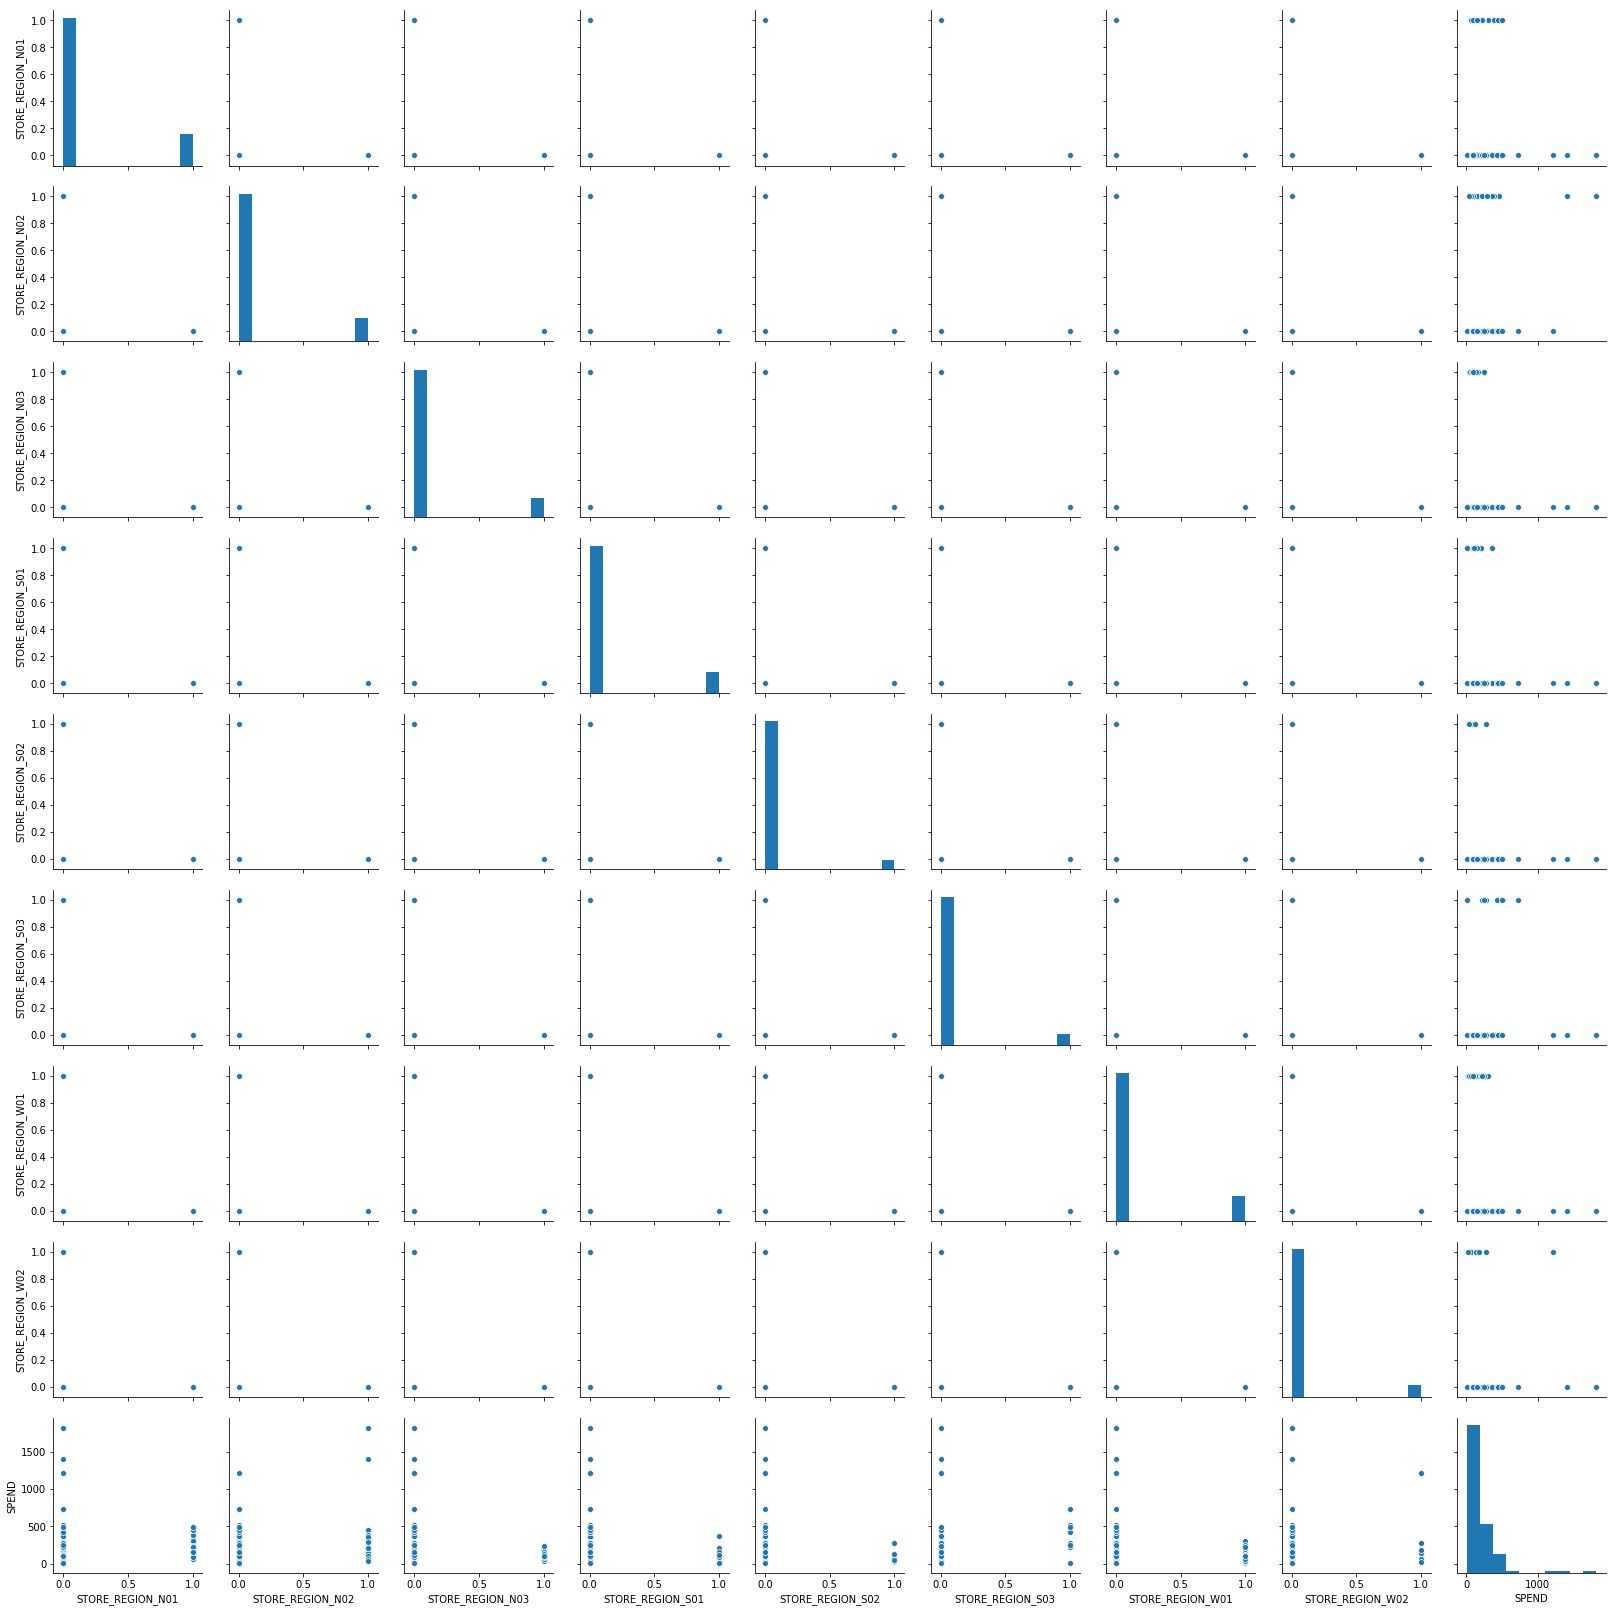

In [48]:
sns.pairplot(data=trial_df[['STORE_REGION_N01', 'STORE_REGION_N02',
       'STORE_REGION_N03', 'STORE_REGION_S01', 'STORE_REGION_S02',
       'STORE_REGION_S03', 'STORE_REGION_W01', 'STORE_REGION_W02', 'SPEND']])

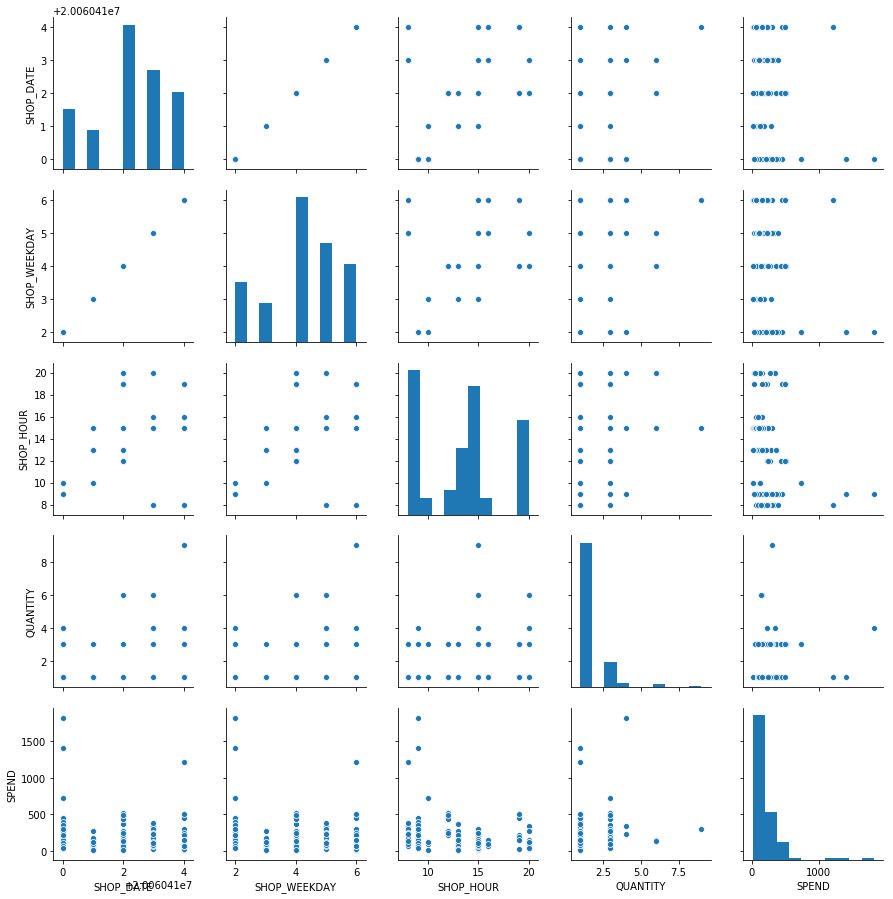

In [49]:
sns.pairplot(data=trial_df[['SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY', 'SPEND',]])